# vLLM (Paged Attention)

In [16]:
%matplotlib inline

import os, sys
import matplotlib.pyplot as plt
from prettytable import PrettyTable
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
font = {'family': 'serif', 'size': 18}
plt.rc('font', **font)

# vLLM, TRF, TRF+FA



 prefill
256


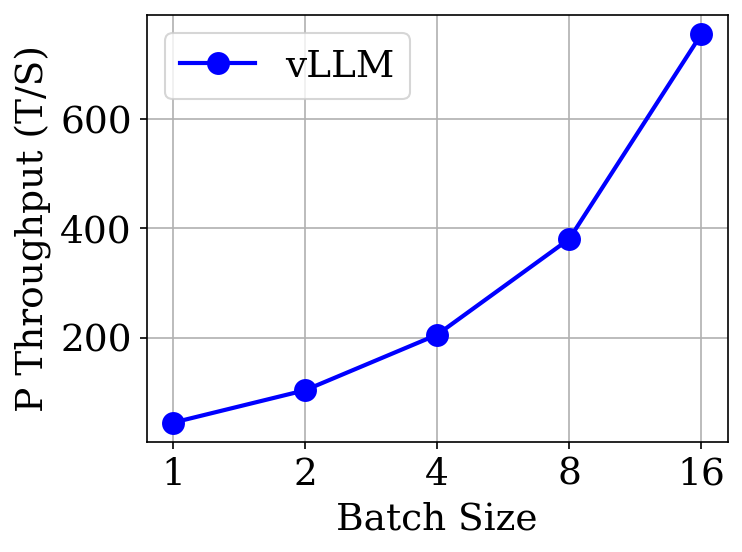

512
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_512.log


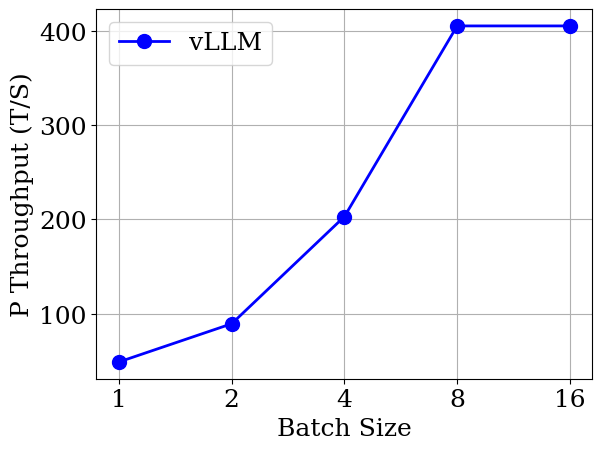

1024
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_8_tp_1_quant_bits_0_quant_policy_None_prompt_length_1024.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_1024.log


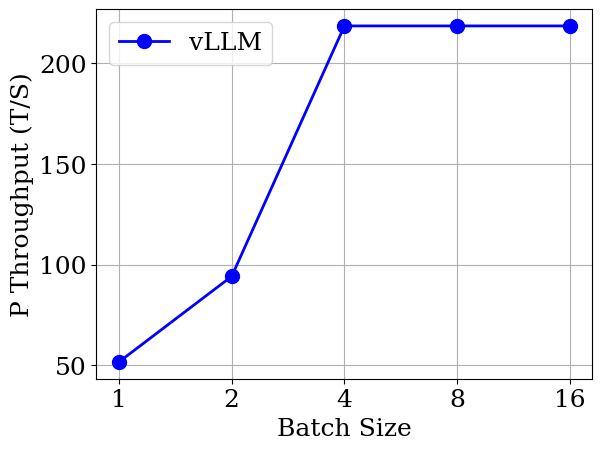

2048
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_4_tp_1_quant_bits_0_quant_policy_None_prompt_length_2048.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_8_tp_1_quant_bits_0_quant_policy_None_prompt_length_2048.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_2048.log


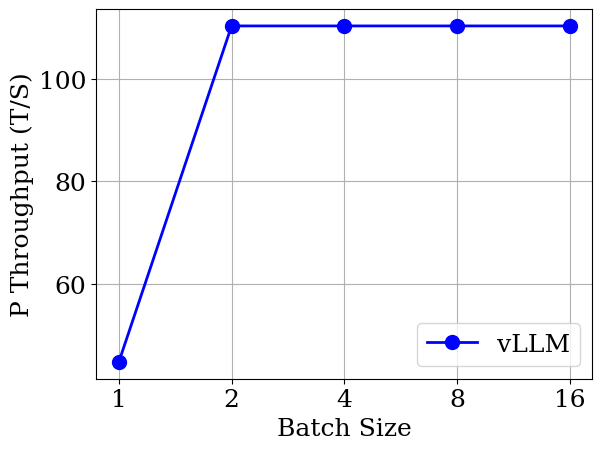

3072
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_2_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_4_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_8_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log


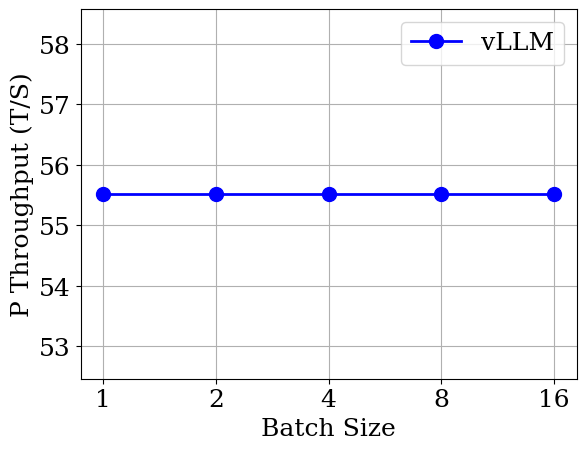

4000
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_2_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_4_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_8_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/prefill_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log


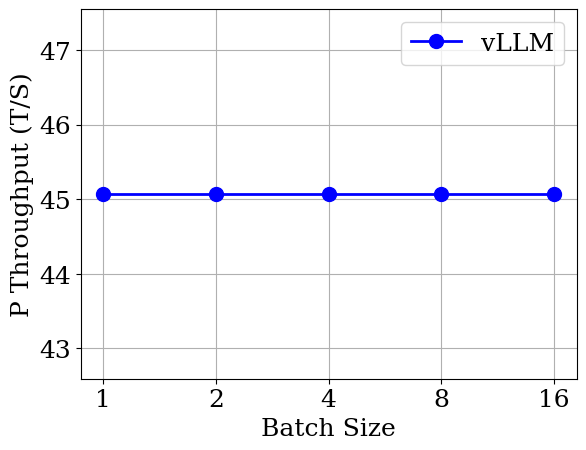



 decoding
256


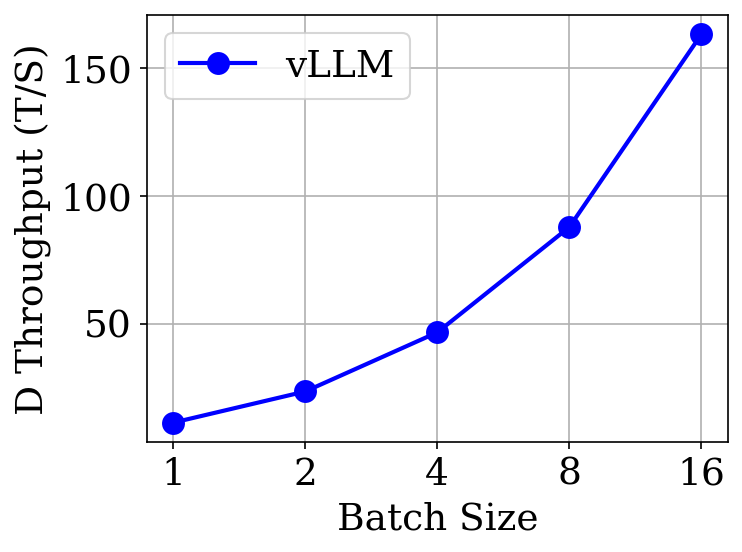

512


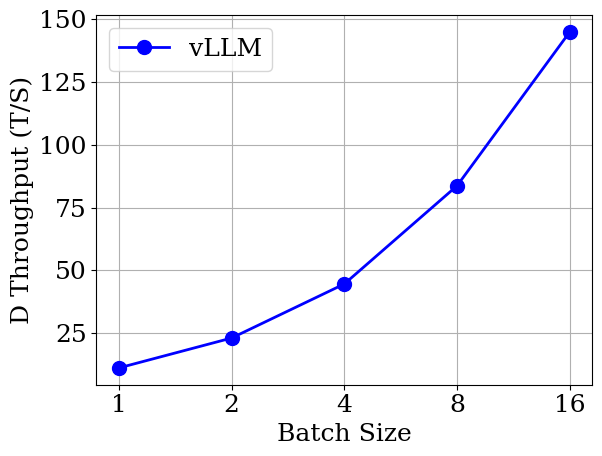

1024


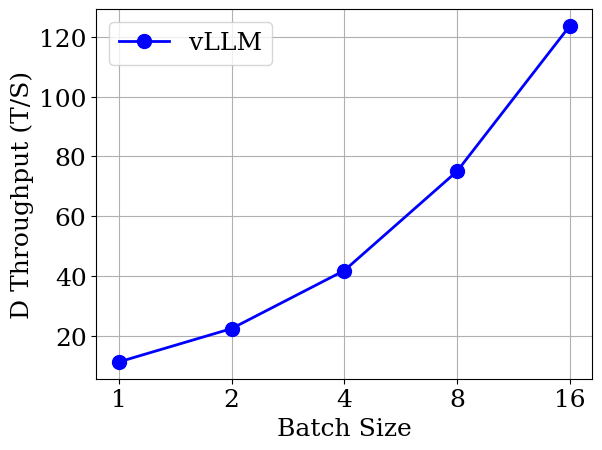

2048


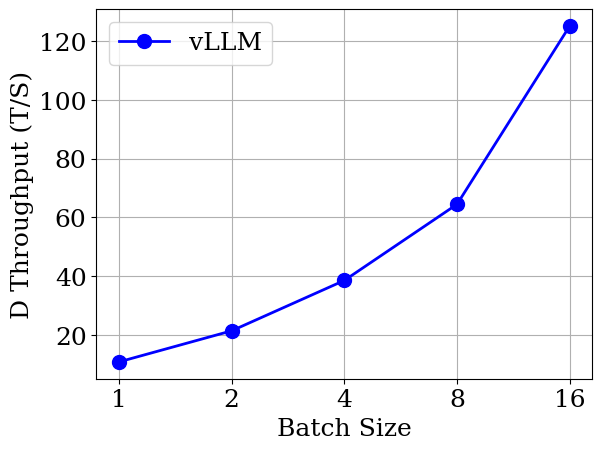

3072
check vllm_logs/decoding_model_meta-llama-Llama-2-7b-hf_batch_size_4_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/decoding_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_3072.log


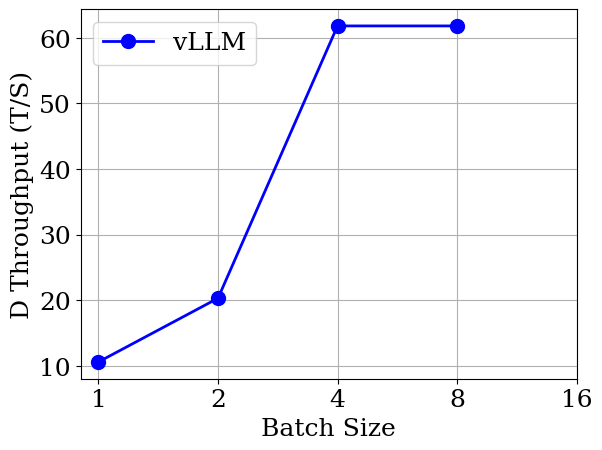

4000
check vllm_logs/decoding_model_meta-llama-Llama-2-7b-hf_batch_size_2_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log
----- cannot find matched bsz data for decoding:----- 
 vllm_logs/decoding_model_meta-llama-Llama-2-7b-hf_batch_size_16_tp_1_quant_bits_0_quant_policy_None_prompt_length_4000.log


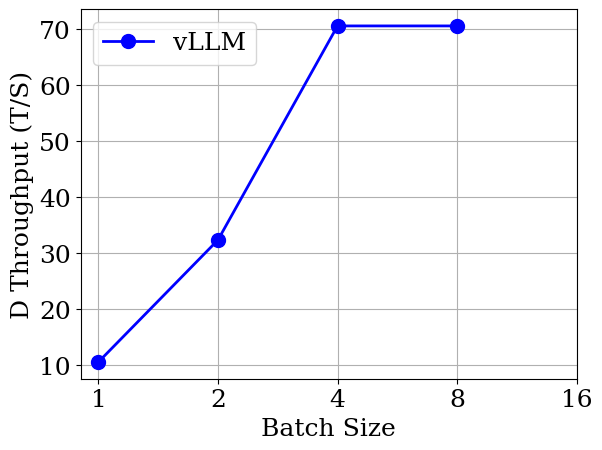

In [17]:
%matplotlib inline

import os, sys
import matplotlib.pyplot as plt
from prettytable import PrettyTable


model = "meta-llama-Llama-2-7b-hf"
for phase in ['prefill', 'decoding']: 
    print("\n\n", phase)

    plt.figure(figsize=(5, 3.7), dpi=150)
    for prompt_length in [256, 512, 1024, 2048, 3072, 4000]:
        print(prompt_length)
        vllm_thr_list = []
        trf_thr_list = []
        trffa_thr_list = []

        for bsz in [1, 2, 4, 8, 16]:
            # Q_Policy = "KIVI"
            # Q_Policy = "HEAD"
            # for (quant, policy) in [(0, "None"), (8, "KIVI"), (4, "KIVI")]: 
            # for (quant, policy) in [(0, "None"), (8, Q_Policy), (4, Q_Policy)]: 

            # NOTE: vLLM
            # for (quant, policy) in [(0, "None")]:
            quant = 0
            policy = "None"
            path = os.path.join("vllm_logs", f"{phase}_model_{model}_batch_size_{bsz}_tp_1_quant_bits_{quant}_quant_policy_{policy}_prompt_length_{prompt_length}.log")
            if not os.path.exists(path): 
                # print(f'vllm ???? {path}')
                continue
            with open(path, 'r') as f: 
                lines = f.readlines() 
            # time_cost = float(lines[-1].split("elapsed time is ")[-1][:-2])

            try:
                time_cost = float(lines[-1].split("elapsed time is ")[-1][:-2])
            except:
                print(f"check {path}")
                continue

            if quant == 0: 
                quant = 16
            if phase in ['prompt']: 
                thr = int(prompt_length / time_cost)
            else:

                time_cost = 0
                for line in lines[:-1]:
                    if 'decoding' in line and f"bsz {bsz}" in line:
                        start_index = line.index("took") + len("took ")
                        end_index = line.index("ms")
                        time_cost += float(line[start_index:end_index].strip())
                time_cost /= 1000.0 # ms to s
                # thr = round(64 * bsz / time_cost, 2)

                # FIXME: cannot find matched bsz data for decoding, div by 0
                try:
                    thr = round(64 * bsz / time_cost, 2)
                except:
                    print(f'----- cannot find matched bsz data for decoding:----- \n {path}')
                    time_cost = float(lines[-1].split("elapsed time is ")[-1][:-2])
                    # continue
            # tab.add_row([bsz, quant, prompt_length, policy, thr])
            # print(f"vllm: {[bsz, quant, prompt_length, policy, thr]}")
            vllm_thr_list.append(thr)



            # # NOTE: TRF
            # fa = "False"
            # # path = os.path.join("trf_logs", f"{phase}_model_Llama-2-7b-hf_batch_size_{bsz}_prompt_length_{prompt_length}_fa_{fa}.log")
            # quant_policy = "None"
            # path = os.path.join("0_logs_iter3", f"{phase}_model_Llama-2-7b-hf_batch_size_{bsz}_quant_policy_{quant_policy}_prompt_length_{prompt_length}_fa_{fa}.log")
            # if not os.path.exists(path): 
            #     # print(f'trf ???? {path}')
            #     continue
            # with open(path, 'r') as f: 
            #     lines = f.readlines() 
            # time_cost = float(lines[-1].split("elapsed time is ")[-1][:-2])
            # if quant == 0: 
            #     quant = 16
            # if phase in ['prompt']: 
            #     thr = int(prompt_length / time_cost)
            # else:
            #     # thr = int(32 / time_cost)
            #     # thr = time_cost
            #     thr = round(64 * bsz / time_cost, 2)
            # # tab.add_row([bsz, quant, prompt_length, policy, thr])
            # # print([bsz, prompt_length, policy, thr])
            # # print(f"trf: {[bsz, prompt_length, policy, thr]}")
            # trf_thr_list.append(thr)



            # # NOTE: TRF+FA
            # fa = "True"
            # # path = os.path.join("trf_logs", f"{phase}_model_Llama-2-7b-hf_batch_size_{bsz}_prompt_length_{prompt_length}_fa_{fa}.log")
            # quant_policy = "None"
            # path = os.path.join("0_logs_iter3", f"{phase}_model_Llama-2-7b-hf_batch_size_{bsz}_quant_policy_{quant_policy}_prompt_length_{prompt_length}_fa_{fa}.log")
            # if not os.path.exists(path): 
            #     # print(f'trf fa ???? {path}')
            #     continue 
            # with open(path, 'r') as f: 
            #     lines = f.readlines() 
            # time_cost = float(lines[-1].split("elapsed time is ")[-1][:-2])
            # if quant == 0: 
            #     quant = 16
            # if phase in ['prompt']: 
            #     thr = int(prompt_length / time_cost)
            # else: 
            #     # thr = int(32 / time_cost)
            #     # thr = time_cost
            #     thr = round(64 * bsz / time_cost, 2)
            # # tab.add_row([bsz, quant, prompt_length, policy, thr])
            # # print([bsz, prompt_length, policy, thr])
            # # print(f"trf+fa: {[bsz, prompt_length, policy, thr]}")
            # trffa_thr_list.append(thr)


        plt.plot(vllm_thr_list, marker='o', markersize=10, linestyle='-', linewidth=2, color='b', label='vLLM')
        # plt.plot(trf_thr_list, marker='^', markersize=10, linestyle='-', linewidth=2, color='r', label='TRF')
        # plt.plot(trffa_thr_list, marker='v', markersize=10, linestyle='-', linewidth=2, color='g', label='TRF+FA')
        plt.xlabel('Batch Size', fontsize=18)
        if phase == "prefill":
            plt.ylabel('P Throughput (T/S)', fontsize=18)
        elif phase == "decoding":
            plt.ylabel('D Throughput (T/S)', fontsize=18)
        plt.xticks(ticks=list(range(5)), labels=[str(bsz) for bsz in [1, 2, 4, 8, 16]], fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.savefig(f"./frw_figs/frw_phase_{phase}_promptlen_{prompt_length}.pdf", bbox_inches='tight')
        plt.show()

        vllm_thr_list.clear()
        trf_thr_list.clear()
        trffa_thr_list.clear()